#Importing necessary library packages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.pipeline import Pipeline as ImbPipeline


#Loading the dataset

In [53]:
synthetic_financial_data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
synthetic_financial_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#Display the data information

In [54]:
synthetic_financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#Checking for missing values

In [55]:
print(synthetic_financial_data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


#Summary Statistics

In [56]:
print("Summary Statistics:")
synthetic_financial_data.describe()

Summary Statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#Visualization

#Transaction Type Distribution

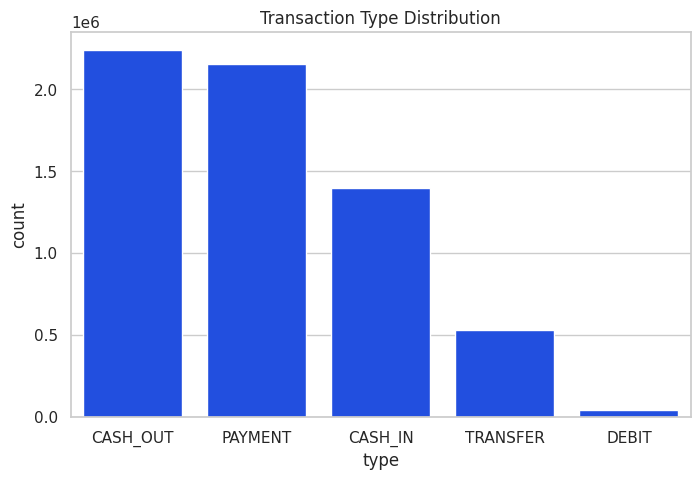

In [57]:
sns.set(style="whitegrid", palette="bright")

plt.figure(figsize=(8, 5))
sns.countplot(data=synthetic_financial_data, x='type', order=synthetic_financial_data['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.show()

#Fraudulent Transaction Amounts

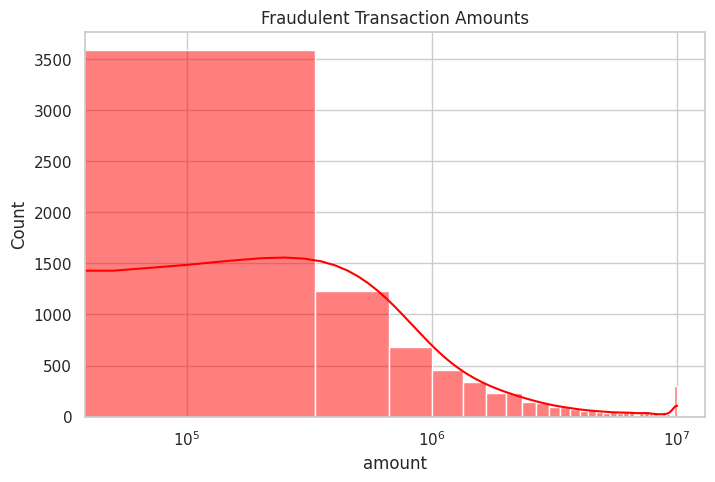

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(synthetic_financial_data[synthetic_financial_data['isFraud'] == 1]['amount'], bins=30, kde=True, color='red')
plt.title('Fraudulent Transaction Amounts')
plt.xscale('log')
plt.show()

#Origin Account Balance Analysis

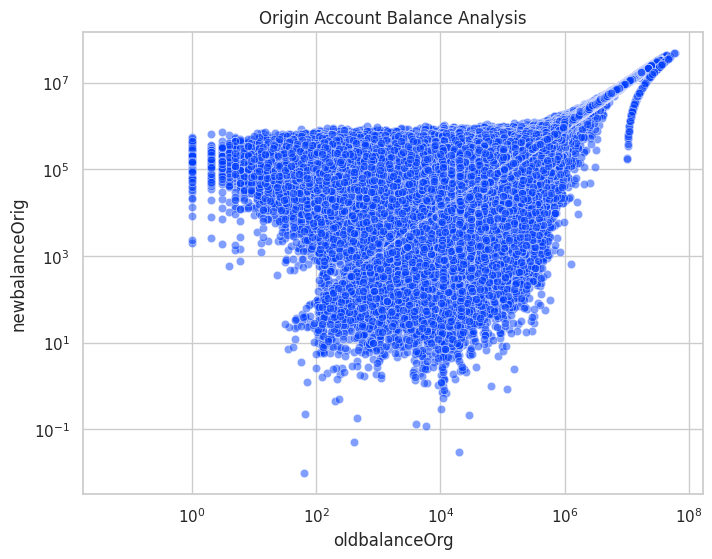

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=synthetic_financial_data, x='oldbalanceOrg', y='newbalanceOrig', alpha=0.5)
plt.title('Origin Account Balance Analysis')
plt.xscale('log')
plt.yscale('log')
plt.show()

#Top 10 Fraudulent Destination Accounts

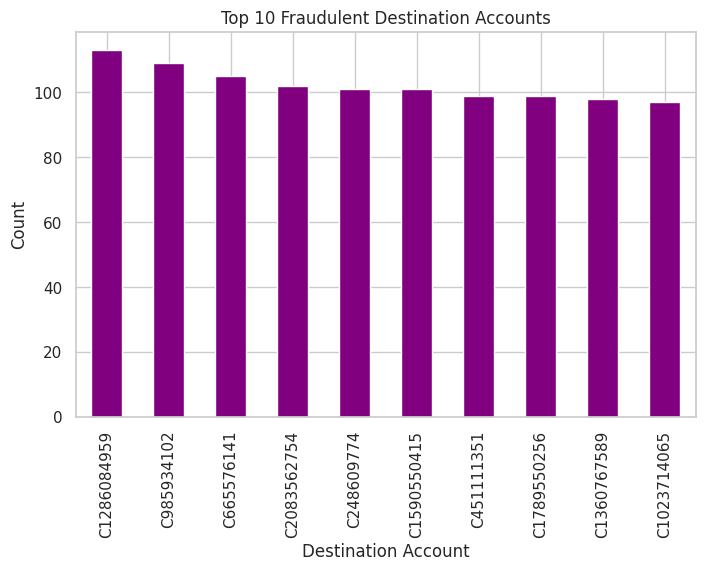

In [60]:
plt.figure(figsize=(8, 5))
fraud_destinations = synthetic_financial_data['nameDest'].value_counts().head(10)
fraud_destinations.plot(kind='bar', color='purple')
plt.title('Top 10 Fraudulent Destination Accounts')
plt.xlabel('Destination Account')
plt.ylabel('Count')
plt.show()

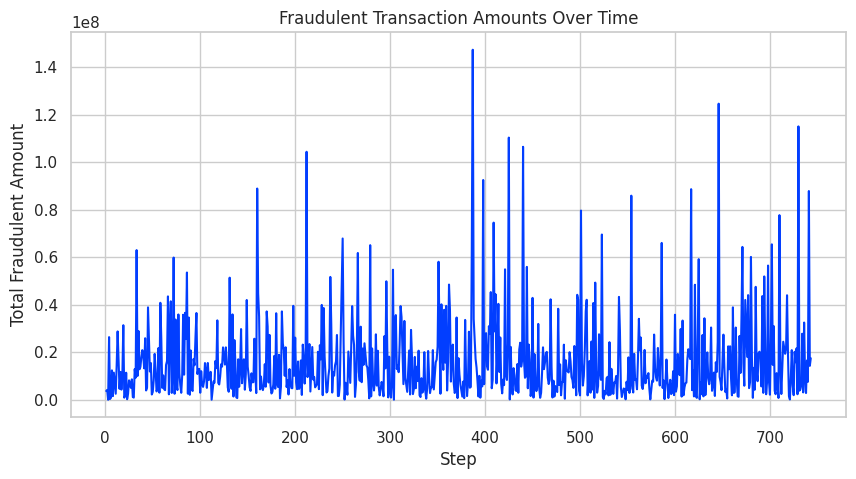

In [61]:
plt.figure(figsize=(10, 5))
synthetic_financial_data[synthetic_financial_data['isFraud'] == 1].groupby('step')['amount'].sum().plot()
plt.title('Fraudulent Transaction Amounts Over Time')
plt.xlabel('Step')
plt.ylabel('Total Fraudulent Amount')
plt.show()


#Difference between Fraud and Non-Fraud Transactions

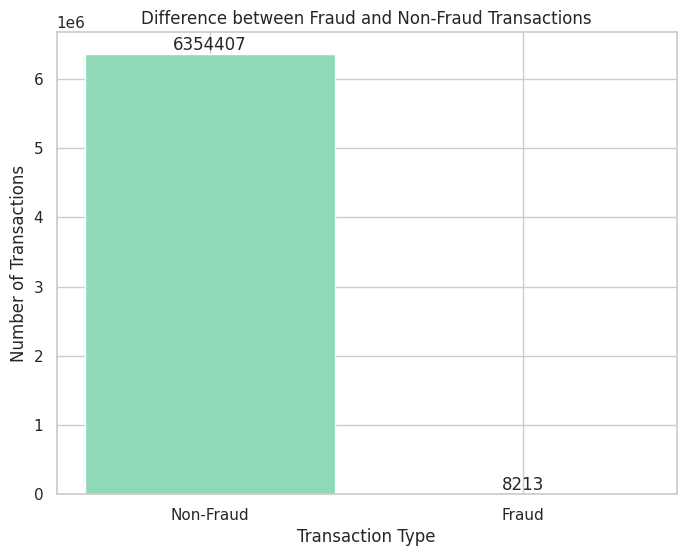

In [62]:
fraud_counts = synthetic_financial_data['isFraud'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(['Non-Fraud', 'Fraud'], fraud_counts, color=['#8fd9b6', '#f28d8d'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.title('Difference between Fraud and Non-Fraud Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.xticks(rotation=0)
plt.show()


#Correlation Matrix

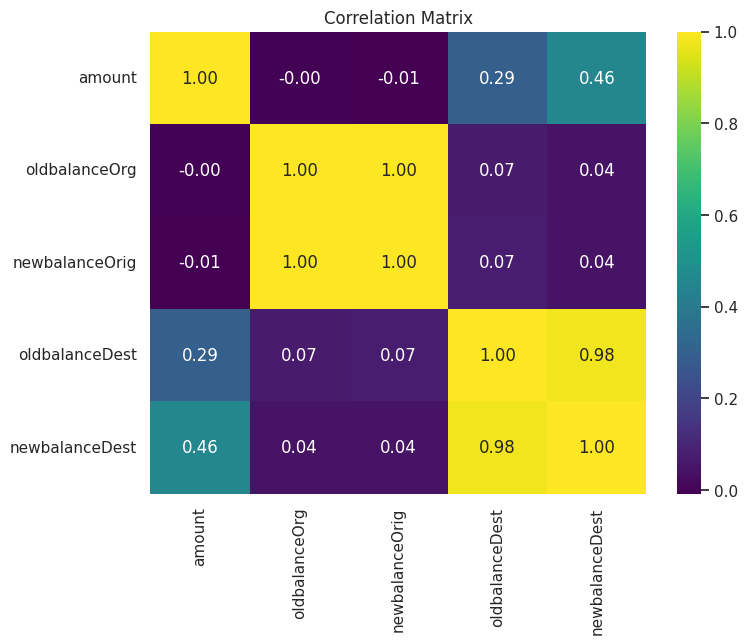

In [63]:
corr_data = synthetic_financial_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#Model

#Machine Learning Model of Logistic Regression

In [64]:
if 'nameOrig' in synthetic_financial_data.columns:
    synthetic_financial_data = synthetic_financial_data.drop(['nameOrig'], axis=1)
if 'nameDest' in synthetic_financial_data.columns:
    synthetic_financial_data = synthetic_financial_data.drop(['nameDest'], axis=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']),
        ('cat', OneHotEncoder(drop='first'), ['type'])
    ]
)

pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

X = synthetic_financial_data.drop(['isFraud'], axis=1)
y = synthetic_financial_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred_lr = pipeline.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")

print("\nClassification Report of Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Accuracy of Logistic Regression: 0.9478

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.95      0.04      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



#Confusion Matrix of Logistic Regression

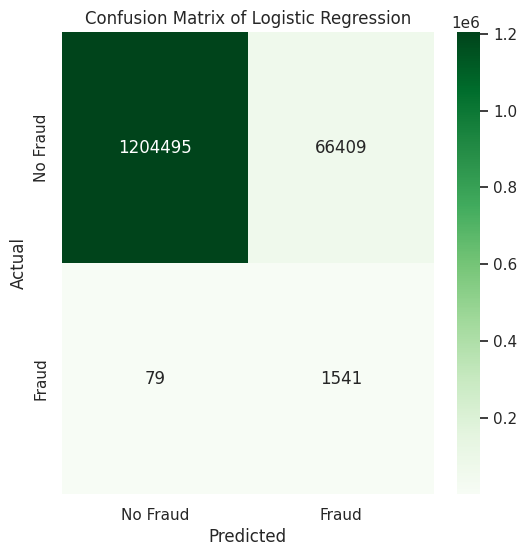

In [65]:
y_pred_lr = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


#Receiver Operating Characteristic Curve of Logistic Regression

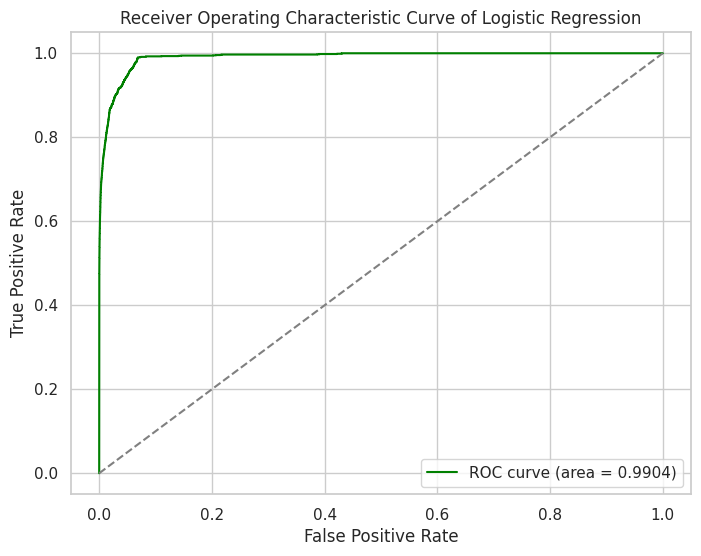

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='Green', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#Machine Learning Model of Gradient Boosting

In [67]:
if 'nameOrig' in synthetic_financial_data.columns:
    synthetic_financial_data = synthetic_financial_data.drop(['nameOrig'], axis=1)
if 'nameDest' in synthetic_financial_data.columns:
    synthetic_financial_data = synthetic_financial_data.drop(['nameDest'], axis=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']),
        ('cat', OneHotEncoder(drop='first'), ['type'])
    ]
)

pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

X = synthetic_financial_data.drop(['isFraud'], axis=1)
y = synthetic_financial_data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred_gb = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb:.4f}")
print("\nClassification Report of Gradient Boosting:\n", classification_report(y_test, y_pred_gb))



Accuracy of Gradient Boosting: 0.9824

Classification Report of Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270904
           1       0.07      1.00      0.13      1620

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



#Confusion Matrix of Gradient Boosting

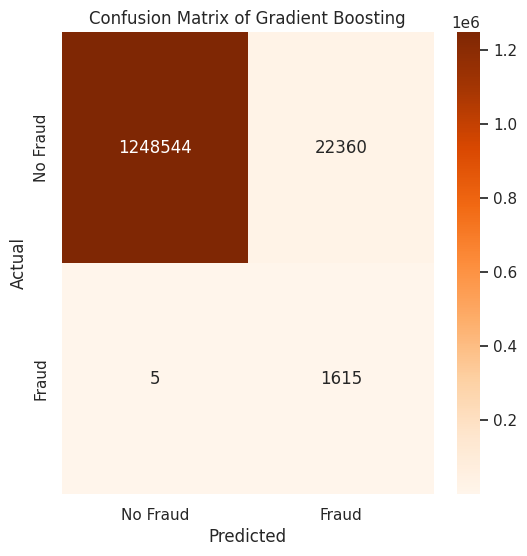

In [68]:
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()


#Receiver Operating Characteristic Curve of Gradient Boosting

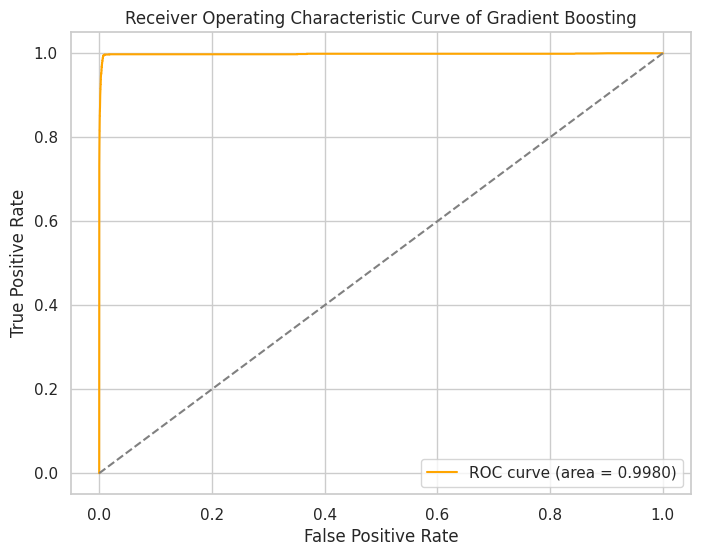

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve of Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


#Comparison of Logistic Regression and Gradient Boosting

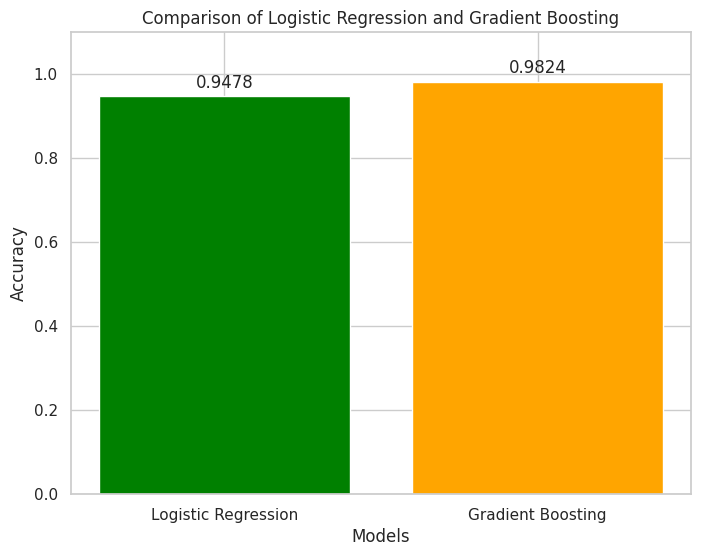

In [70]:
models = ['Logistic Regression', 'Gradient Boosting']
accuracies = [accuracy_lr, accuracy_gb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['Green', 'orange'])
plt.ylim(0, 1.1)
plt.title('Comparison of Logistic Regression and Gradient Boosting')
plt.ylabel('Accuracy')
plt.xlabel('Models')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

plt.show()